# importing necessary libraries

In [3]:
#importing the data
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline

# Reading the data

In [2]:
reps = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=True)

C:\Users\revan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Different kinds of loan status available
reps['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [5]:
reps = reps.loc[reps['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [7]:
#Drop the features missing more than 30% of data
m_f = reps.isnull().mean().sort_values(ascending=False)


Text(0, 0.5, 'Feature count')

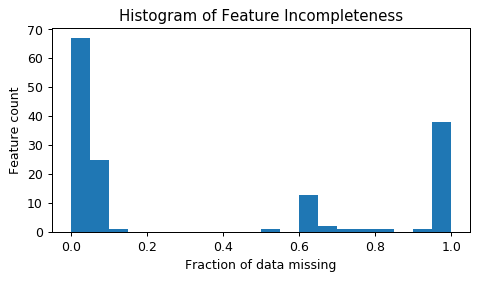

In [8]:

plt.figure(figsize=(6,3), dpi=90)
m_f.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

# Dropping the unnecessary data

In [11]:
d_l = sorted(list(m_f[m_f > 0.3].index))

In [12]:
reps.drop(labels=d_l, axis=1, inplace=True)

# Selecting the attributes which are influencing the final output manually

In [13]:
manual_attr = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [14]:
drop_attr = [col for col in reps.columns if col not in manual_attr]

# Going through each attribute

In [16]:

reps.drop('id', axis=1, inplace=True)

In [17]:
reps['term'] = reps['term'].apply(lambda s: np.int8(s.split()[0]))


In [18]:
reps.drop('grade', axis=1, inplace=True)


In [19]:
reps.drop(labels='emp_title', axis=1, inplace=True)


In [20]:
reps['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)


In [21]:
reps['emp_length'].replace('< 1 year', '0 years', inplace=True)


In [22]:
# conversion of employee length function
def xy(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
    
reps['emp_length'] = reps['emp_length'].apply(xy)


In [23]:
reps['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)


In [24]:
reps['annual_inc'] = reps['annual_inc'].apply(lambda x: np.log10(x+1))


In [25]:
reps.drop('title', axis=1, inplace=True)


In [27]:
# Drop the zipcode attribute
reps.drop(labels='zip_code', axis=1, inplace=True)


In [28]:
reps['earliest_cr_line'] = reps['earliest_cr_line'].apply(lambda s: int(s[-4:]))


In [29]:
#Average of the fico scores
reps['fico_score'] = (reps['fico_range_low'] + reps['fico_range_high'])//2


In [30]:
reps.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)


In [31]:
# Conversion
reps['log_revol_bal'] = reps['revol_bal'].apply(lambda x: np.log10(x+1))


In [32]:
#Conversion of the chargedoff variable to 0/1
reps['charged_off'] = (reps['loan_status'] == 'Charged Off').apply(np.uint8)
reps.drop('loan_status', axis=1, inplace=True)

# Training and testing data-split

In [35]:
reps['issue_d'] = pd.to_datetime(reps['issue_d'])


In [37]:
reps_train = reps.loc[reps['issue_d'] <  reps['issue_d'].quantile(0.9)]
reps_test =  reps.loc[reps['issue_d'] >= reps['issue_d'].quantile(0.9)]

In [38]:
reps_train.drop('issue_d', axis=1, inplace=True)
reps_test.drop('issue_d', axis=1, inplace=True)

C:\Users\revan\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
reps_y_train = reps_train['charged_off']
reps_y_test = reps_test['charged_off']

In [41]:
reps_X_train = reps_train.drop('charged_off', axis=1)
reps_X_test = reps_test.drop('charged_off', axis=1)